In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

combined_pop = pd.read_csv(r"C:\Users\ASYIKIN\OneDrive\Desktop\PYTHON FOR DATA ANALYSIS\PROJECTS\Population\Dataset_pop\combined_pop.csv")
age = pd.read_csv(r"C:\Users\ASYIKIN\OneDrive\Desktop\PYTHON FOR DATA ANALYSIS\PROJECTS\Population\Dataset_pop\age.csv")
big_data = pd.read_csv(r"C:\Users\ASYIKIN\OneDrive\Desktop\PYTHON FOR DATA ANALYSIS\PROJECTS\Population\Dataset_pop\big_pop_data")

total_eth_male = big_data.groupby('Year').agg({
    'Total': 'sum',
    'Male_Bumi': 'sum',
    'Male_Chinese': 'sum',
    'Male_Indian': 'sum',
    'Male_Others': 'sum',
    'Male_non Citizens': 'sum'
}).reset_index()

total_eth_fem = big_data.groupby('Year').agg({
    'Total': 'sum',
    'Female_Bumi': 'sum',
    'Female_Chinese': 'sum',
    'Female_Indian': 'sum',
    'Female_Others': 'sum',
    'Female_non Citizens': 'sum'
}).reset_index()

total_eth_male = total_eth_male.drop(columns='Total')
total_eth_fem = total_eth_fem.drop(columns='Total')

comb_eth_FM = total_eth_male.merge(total_eth_fem, on='Year')

comb_eth_FM.dropna().head()

#save data frame to csv file
# comb_eth_FM.to_csv('comb_eth_FM.csv', index=False)

,Year,Male_Bumi,Male_Chinese,Male_Indian,Male_Others,Male_non Citizens,Female_Bumi,Female_Chinese,Female_Indian,Female_Others,Female_non Citizens
0,1991,5590.4,2545.1,709.9,98.2,472.9,5531.5,2475.9,696.9,96.5,330.1
1,1992,5762.7,2588.6,725.2,105.7,504.9,5695.6,2510.2,713.0,103.5,357.9
2,1993,5939.5,2633.6,740.8,111.2,538.3,5864.2,2547.7,729.3,108.5,388.0
3,1994,6118.5,2679.2,756.2,115.6,573.2,6036.0,2585.1,745.7,112.9,419.2
4,1995,6298.8,2724.3,770.6,119.7,607.8,6210.1,2621.5,761.7,116.8,450.4


In [2]:
import os
print(os.path.exists('Dataset_pop'))

False


# Line plot for trends

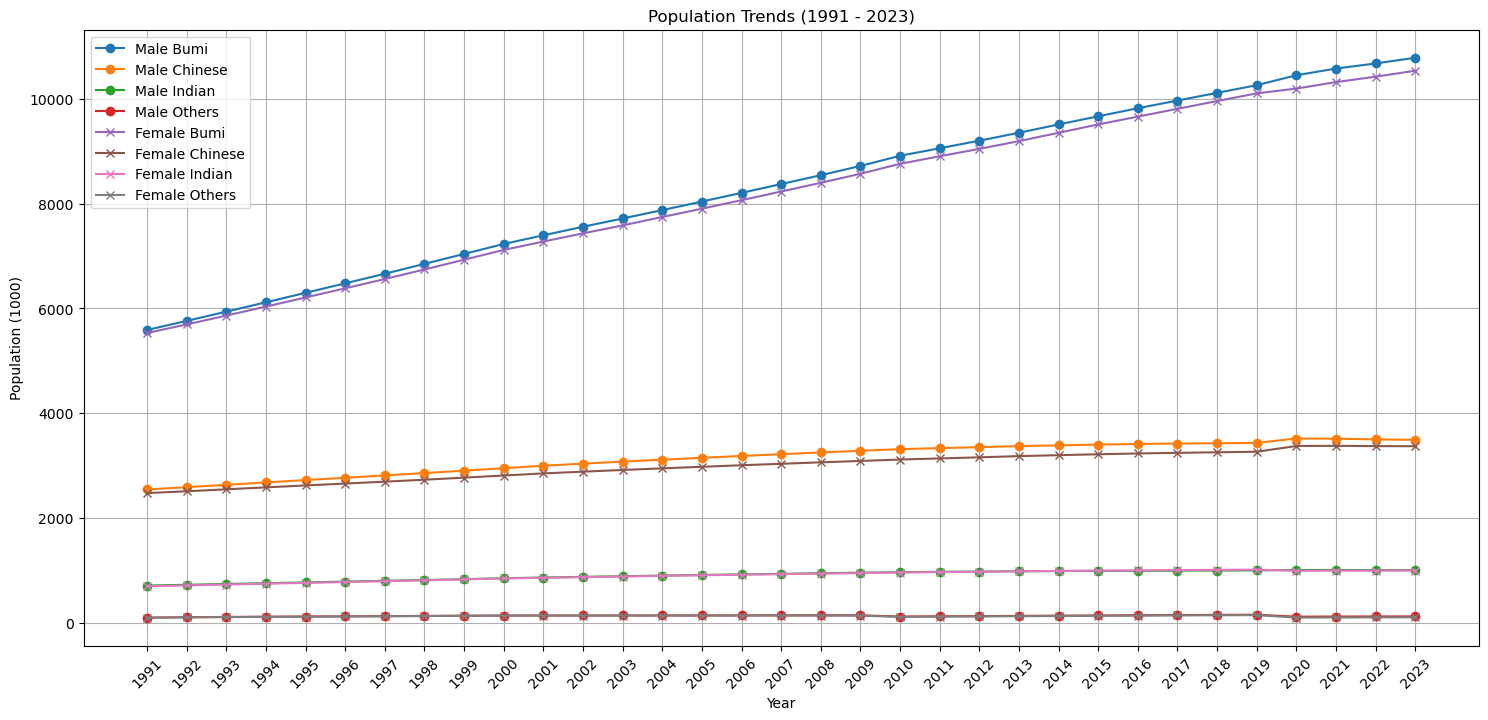

In [3]:
plt.figure(figsize=(18,8))

# male pop
plt.plot(comb_eth_FM['Year'], comb_eth_FM['Male_Bumi'], label='Male Bumi', marker='o'), 
plt.plot(comb_eth_FM['Year'], comb_eth_FM['Male_Chinese'], label='Male Chinese', marker='o'), 
plt.plot(comb_eth_FM['Year'], comb_eth_FM['Male_Indian'], label='Male Indian', marker='o'), 
plt.plot(comb_eth_FM['Year'], comb_eth_FM['Male_Others'], label='Male Others', marker='o')

# male pop
plt.plot(comb_eth_FM['Year'], comb_eth_FM['Female_Bumi'], label='Female Bumi', marker='x'), 
plt.plot(comb_eth_FM['Year'], comb_eth_FM['Female_Chinese'], label='Female Chinese', marker='x'), 
plt.plot(comb_eth_FM['Year'], comb_eth_FM['Female_Indian'], label='Female Indian', marker='x'), 
plt.plot(comb_eth_FM['Year'], comb_eth_FM['Female_Others'], label='Female Others', marker='x')

plt.xlabel('Year')
plt.ylabel('Population (1000)')
plt.title('Population Trends (1991 - 2023)')
plt.legend()
plt.grid(True)

#label each year
plt.xticks(ticks=comb_eth_FM['Year'], rotation=45)

plt.show()

# Growth rate for each demographic

- Formula:
    - Find the difference between ending and starting values
    - divide by starting value
    - (Ending value - starting value) / starting value

- EDA
    - Both female and male among Others ethnicity experienced the steepest drop from 2008/2009 to 2010 with almost -16% drop
    - It bounced back on 2010 but was slighlty declining in a fluctuating manner
    - it fell steeply again during covid, -24% for male and -32% for female

    - During covid on 2019:
        * from 2019 to 2020: Female Bumi and Female Indian were heavily impacted, with drop of 0.89% and 2% and respectively
        * from 2020 to 2021: Female Chin and Male Chinese caught up with the drop growth rate
        * Chi fem dropped from 3.35% to 0.089% growth rate
        * Chi male dropped from 2.45% to -0.1% growth rate
        * Bumi Male dropped from 1.8% to 1.2% gowth rate
        * Ind Male dropped from 0.77% to 0.04% growth rate

    - Post covid 
        * All population across ethnicity and gender has declining growth rate from 2021 to 2022
        * They all SLOWLY increase towards 2023

    - Asian Financial crisis (97-98) causing sudden drop in growth rates across population on year 2000 due to economic hardship
        - It's consistent with the age bracket distribution over time for children age 0 to 4 years old
        - It's literally the only age bracket that dropped significantly around the time period.

- Note: 
    - Slow growth rate does not imply more death but it also may be due to
        * Lower birth rates
        * Higher emigration rates

    - When dealing with smaller data size, small changes would lead to a dramatic change
        * it affects the aggregation calculation and chart sensitivity
        * data will appear more erratic compared to larger group

    - Solution - use log scale or normalize data to minimize visual distortion


In [4]:
# Calculate growth rate:

comb_eth_FM['Growth_Rate_BumiM']= comb_eth_FM['Male_Bumi'].pct_change(periods=1) * 100
comb_eth_FM['Growth_Rate_ChiM' ]= comb_eth_FM['Male_Chinese'].pct_change(periods=1) * 100
comb_eth_FM['Growth_Rate_IndM' ]= comb_eth_FM['Male_Indian'].pct_change(periods=1) * 100
comb_eth_FM['Growth_Rate_OthM' ]= comb_eth_FM['Male_Others'].pct_change(periods=1) * 100

comb_eth_FM['Growth_Rate_BumiF']= comb_eth_FM['Female_Bumi'].pct_change(periods=1) * 100
comb_eth_FM['Growth_Rate_ChiF' ]= comb_eth_FM['Female_Chinese'].pct_change(periods=1) * 100
comb_eth_FM['Growth_Rate_IndF' ]= comb_eth_FM['Female_Indian'].pct_change(periods=1) * 100
comb_eth_FM['Growth_Rate_OthF' ]= comb_eth_FM['Female_Others'].pct_change(periods=1) * 100

# comb_eth_FM.dropna().head()
comb_eth_FM.dropna().head()

#save data frame to csv file
comb_eth_FM.to_csv('comb_eth_FM.csv', index=False)

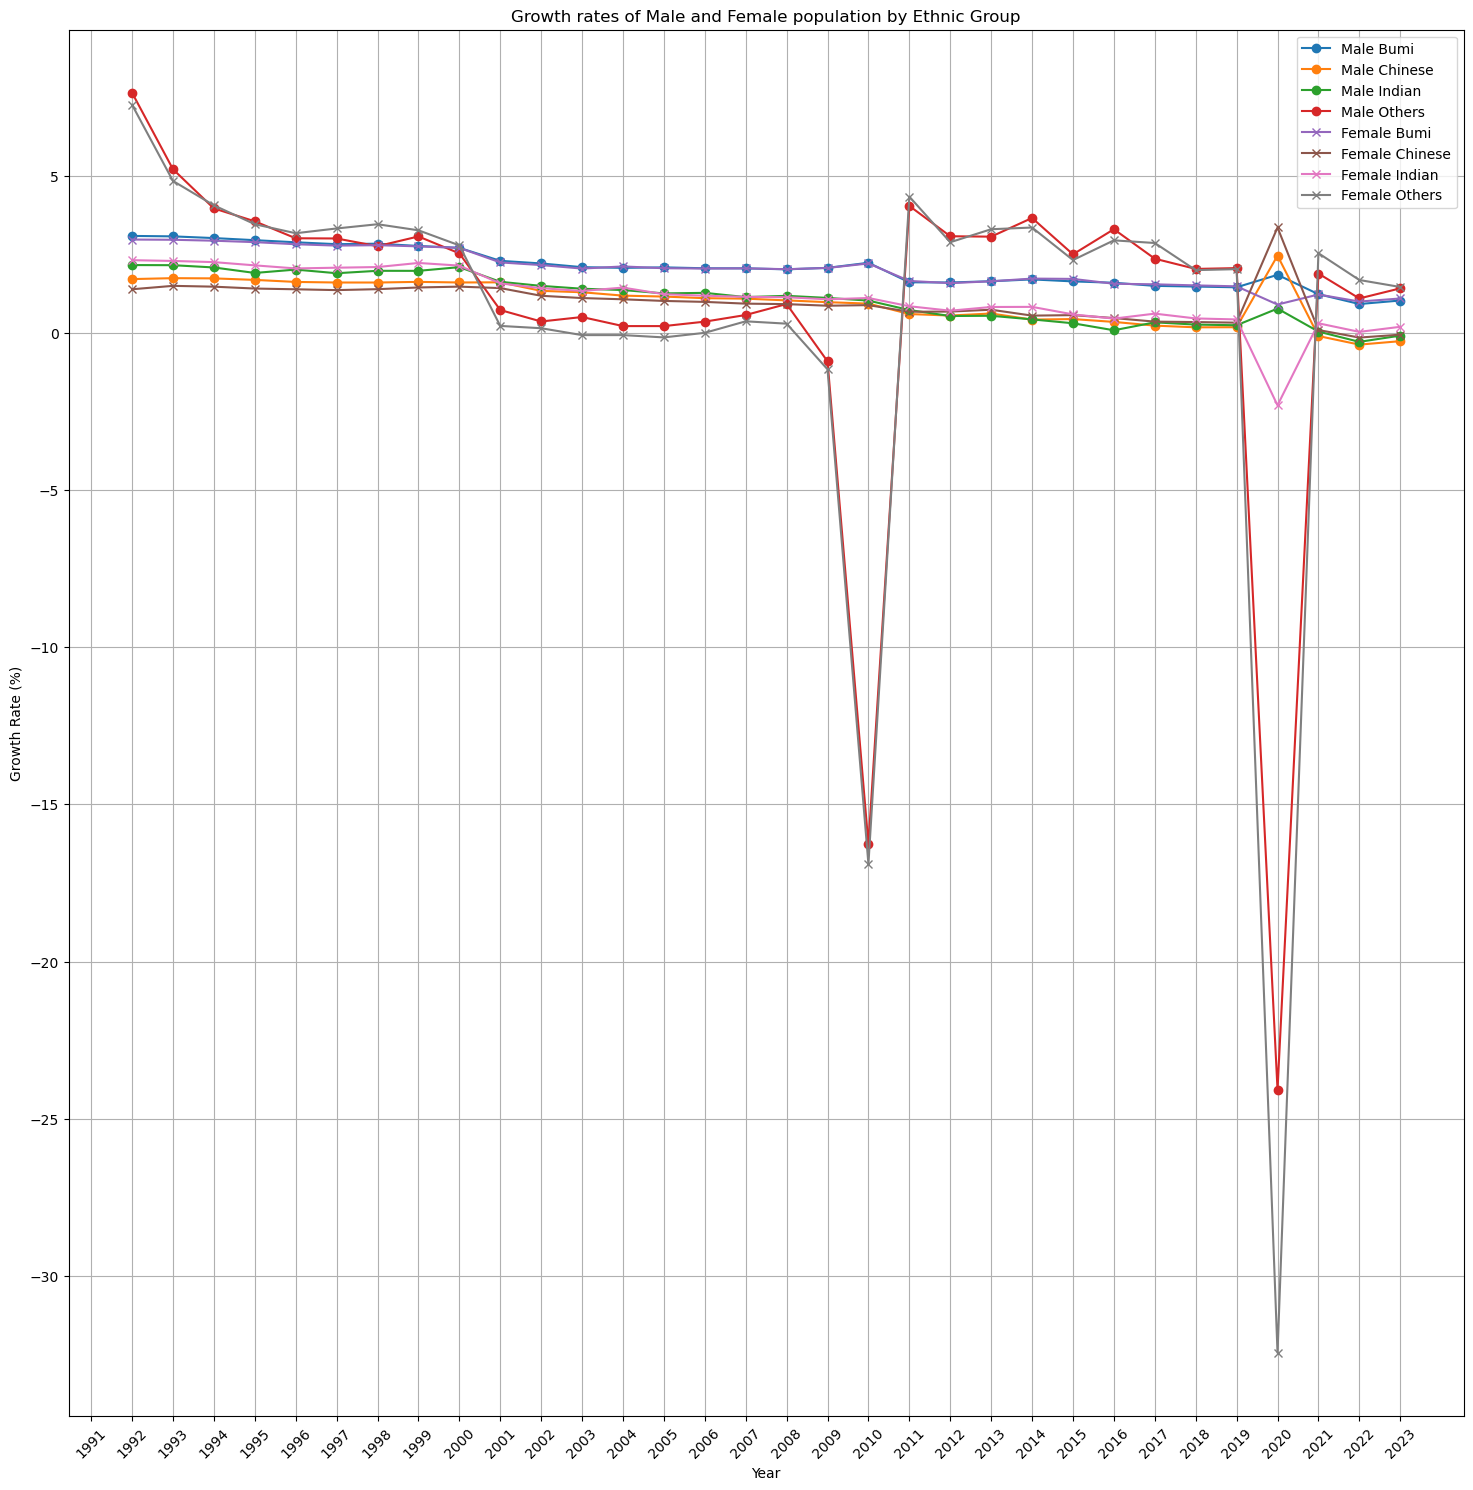

In [5]:
# plot growth rate:

plt.figure(figsize=(18,18))

# male pop
plt.plot(comb_eth_FM['Year'], comb_eth_FM['Growth_Rate_BumiM'], label='Male Bumi', marker='o'), 
plt.plot(comb_eth_FM['Year'], comb_eth_FM['Growth_Rate_ChiM' ], label='Male Chinese', marker='o'), 
plt.plot(comb_eth_FM['Year'], comb_eth_FM['Growth_Rate_IndM' ], label='Male Indian', marker='o'), 
plt.plot(comb_eth_FM['Year'], comb_eth_FM['Growth_Rate_OthM' ], label='Male Others', marker='o')

# male pop
plt.plot(comb_eth_FM['Year'], comb_eth_FM['Growth_Rate_BumiF'], label='Female Bumi', marker='x'), 
plt.plot(comb_eth_FM['Year'], comb_eth_FM['Growth_Rate_ChiF' ], label='Female Chinese', marker='x'), 
plt.plot(comb_eth_FM['Year'], comb_eth_FM['Growth_Rate_IndF' ], label='Female Indian', marker='x'), 
plt.plot(comb_eth_FM['Year'], comb_eth_FM['Growth_Rate_OthF' ], label='Female Others', marker='x')

plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.title('Growth rates of Male and Female population by Ethnic Group')
plt.legend()
plt.grid(True)

#label each year
plt.xticks(ticks=comb_eth_FM['Year'], rotation=45)

plt.show()